**1. Loading the Dataset**

In [1]:
!pip install pystan fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 619.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running s

In [72]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet

In [46]:
temp_df = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv')

In [47]:
temp_df.shape

(3650, 2)

In [48]:
temp_df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


**2. Data Preprocessing**

In [49]:
#checking for null values
temp_df.isna().sum()

,0
Date,0
Daily minimum temperatures,0


In [50]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [51]:
#unwanted character
temp_df[temp_df['Daily minimum temperatures'] == '?0.2']

,Date,Daily minimum temperatures
565,7/20/1982,?0.2


In [52]:
#eliminating every character except for 0 to 9
temp_df['Daily minimum temperatures'] = temp_df['Daily minimum temperatures'].str.replace(r'[^0-9\.\-]', '', regex=True)

In [53]:
#coverting the 'Date' column to datetime datatype
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

#coverting the 'Temp' column to Float datatype
temp_df['Daily minimum temperatures'] = temp_df['Daily minimum temperatures'].astype('float')

In [54]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [55]:
temp_df.head()

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Prophet expects the data in this specific format:

- ds: Column for the date/time values
- y: Column for the values you want to forecast

In [56]:
#renaming the columns
temp_df.rename(columns = {'Date' : 'ds',
                          'Daily minimum temperatures' : 'y'},
               inplace = True)

In [57]:
temp_df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


**3. Model Training**

In [89]:
model = Prophet()

In [90]:
model.fit(temp_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50boccgx/9s_ibbhm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50boccgx/ub58zg5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72252', 'data', 'file=/tmp/tmp50boccgx/9s_ibbhm.json', 'init=/tmp/tmp50boccgx/ub58zg5w.json', 'output', 'file=/tmp/tmp50boccgx/prophet_model7tuco5j0/prophet_model-20240809123830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:38:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**4. Forecasting**

In [91]:
future = model.make_future_dataframe(periods=10, freq = 'D')

In [92]:
forecast = model.predict(future)

In [93]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.845441,12.038807,18.704351,11.845441,11.845441,3.328357,3.328357,3.328357,0.010971,0.010971,0.010971,3.317386,3.317386,3.317386,0.0,0.0,0.0,15.173798
1,1981-01-02,11.843590,11.734473,18.571999,11.843590,11.843590,3.375348,3.375348,3.375348,-0.019836,-0.019836,-0.019836,3.395184,3.395184,3.395184,0.0,0.0,0.0,15.218939
2,1981-01-03,11.841740,11.600937,18.585771,11.841740,11.841740,3.412345,3.412345,3.412345,-0.060155,-0.060155,-0.060155,3.472501,3.472501,3.472501,0.0,0.0,0.0,15.254085
3,1981-01-04,11.839889,11.999684,18.534677,11.839889,11.839889,3.394984,3.394984,3.394984,-0.153103,-0.153103,-0.153103,3.548087,3.548087,3.548087,0.0,0.0,0.0,15.234873
4,1981-01-05,11.838038,12.093151,18.945976,11.838038,11.838038,3.600999,3.600999,3.600999,-0.019721,-0.019721,-0.019721,3.620720,3.620720,3.620720,0.0,0.0,0.0,15.439037


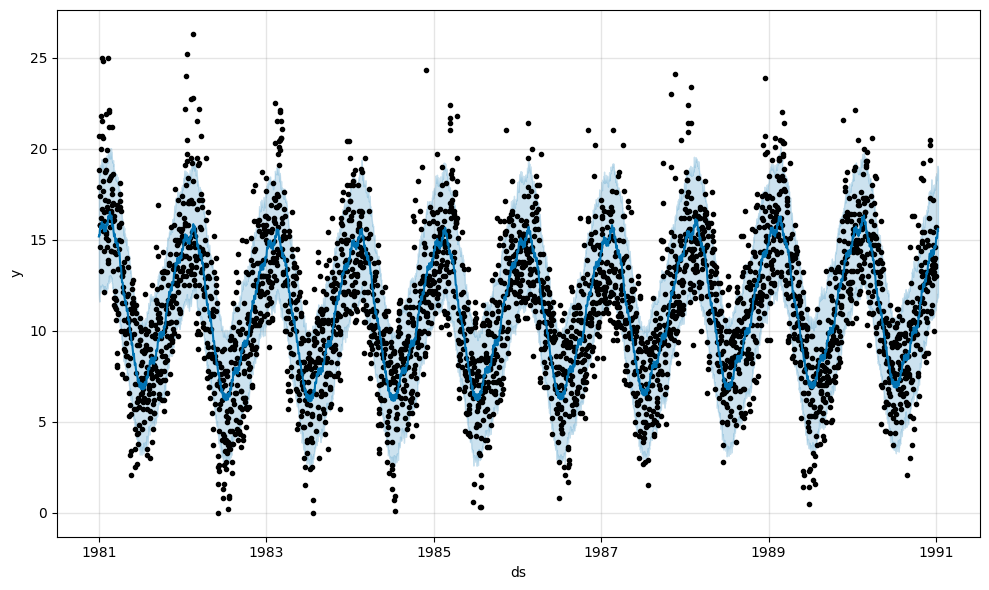

In [94]:
fig = model.plot(forecast)

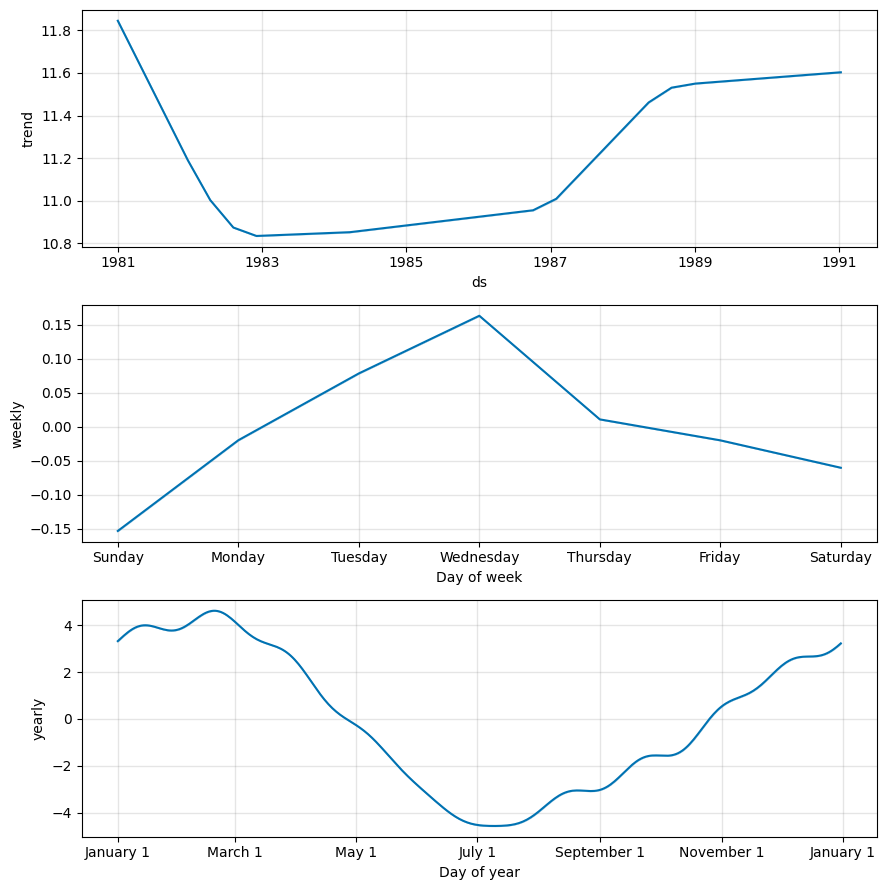

In [95]:
comp = model.plot_components(forecast)